## 1. Import the necessary libraries

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from joblib import dump,load
import import_ipynb
from EDASentimentAnalysis import remove_punctuation,remove_stopword
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## 2 Data preprocessing

>Read csv

In [150]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [151]:
X_train,y_train = ReadData("../data/data_processed/trainprocessed.csv")
X_test,y_test=ReadData("../data/data_processed/testprocesssed.csv")

In [152]:
print(X_test[128])

sản_phẩm sài tạm thích camera pin trâu còn đt sài ko biết bạn nào giống mình ko sài ứng_dụng dể một tối bấm hoài mới cài nhạc chuông điện_thoại hay mất


In [153]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation 

In [154]:
def wordseparation(comment):
   tokens = comment.split()
   return tokens

> Use tfidf to represent words

In [155]:
vectorizer = TfidfVectorizer(tokenizer=wordseparation)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [156]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(8898, 12613)
(2224, 12613)


In [157]:
print(X_train_tfidf[0])

  (0, 10317)	0.20428028336418255
  (0, 3698)	0.2745435740693502
  (0, 1476)	0.2061041337484284
  (0, 1290)	0.444074785430777
  (0, 10250)	0.2801596933176837
  (0, 1274)	0.46409203850981834
  (0, 5850)	0.09161265511179266
  (0, 2263)	0.2115717758304808
  (0, 5793)	0.37168374704483625
  (0, 2694)	0.28904618569164797
  (0, 4919)	0.19895104744758288
  (0, 7911)	0.18684129449581544


> Visualize a sentence

In [158]:
feature_names = vectorizer.get_feature_names_out()  ## lấy danh sách các từ trong từ điển
first_doc_tfidf = X_train_tfidf[0].tocoo()
words_tfidf = {feature_names[word]: tfidf for word, tfidf in zip(first_doc_tfidf.col, first_doc_tfidf.data)}

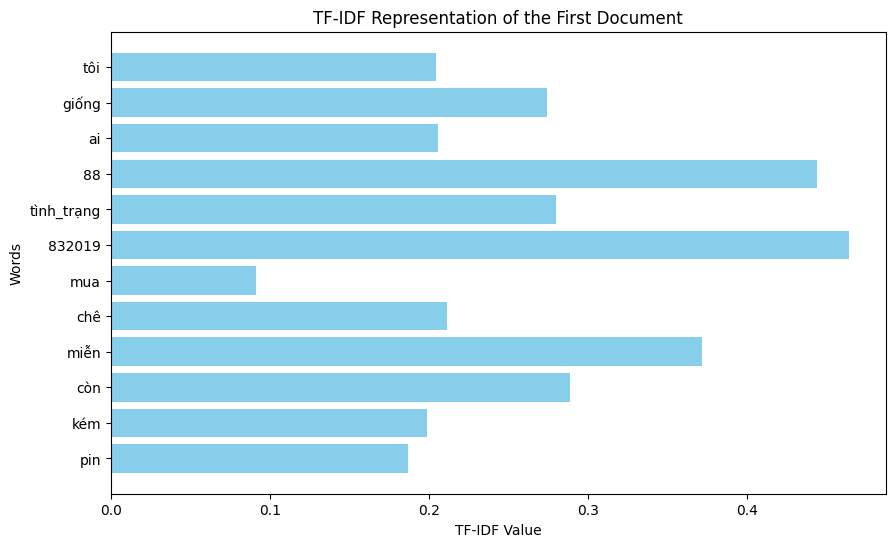

In [159]:
words = list(words_tfidf.keys())
values = list(words_tfidf.values())
plt.figure(figsize=(10, 6))
plt.barh(words, values, color='skyblue')
plt.xlabel('TF-IDF Value')
plt.ylabel('Words')
plt.title('TF-IDF Representation of the First Document')
plt.gca().invert_yaxis()
plt.show()

## 3.Built Model KNN

### 3.1 Use K-Fold Cross-validation technique to find the best set of parameters

In [160]:
param_grid = {
    'n_neighbors': np.random.randint(1, 101, size=100),
}

In [161]:
grid_search = GridSearchCV(KNeighborsClassifier(metric='cosine'), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 34}
Best cross-validation score: 0.7641062710397838


### 3.2 Model KNN

In [170]:
model_knn=KNeighborsClassifier(metric='cosine',n_neighbors=34)

### 3.3 Train KNN

In [171]:
model_knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=34)

> dump file knn_model_sentiment.pkl

In [172]:
dump(model_knn, '../model/knn_model_sentiment.pkl')

['../model/knn_model_sentiment.pkl']

### 3.4. Evaluating

In [173]:
model_knn_loaded=load('../model/knn_model_sentiment.pkl')

> Function Datapreprocessing

In [174]:
def Proprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= remove_stopword(comment)
    comment= [ViTokenizer.tokenize(comment)]
    comment=vectorizer.transform(comment)
    return comment

> sample

In [175]:
comment="Máy thiết kế quá đẹp ,dùng dk mấy hôm r thấy máy vẫn ổn ,tiếc là pin tụt quá nhanh ,pin sạc thì nhanh nóng 😌"
comment=Proprocessing(comment)
print(model_knn_loaded.predict(comment))

['Positive']


> predict test dataset

In [176]:
result_predict=model_knn_loaded.predict(X_test_tfidf)

> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [177]:
accuracy=accuracy_score(y_test,result_predict)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test,result_predict,average='weighted')
print(f"Precision: {precision:.4f}")
recall=recall_score(y_test,result_predict,average='weighted')
print(f"Recall: {recall:.4f}")
f1score=f1_score(y_test,result_predict,average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.7684
Precision: 0.7953
Recall: 0.7684
F1-score: 0.727842906099747
